# **Project Name**    - Uber Supply Demand Gap Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1     - MOHAMMAD IMTIAZ AHMED**

# **Project Summary -**

The Uber Supply–Demand Gap Analysis project focuses on identifying and understanding the mismatch between customer ride requests (demand) and driver availability (supply) using historical Uber request data. The primary objective of this analysis is to uncover patterns, trends, and operational bottlenecks that lead to trip cancellations or unfulfilled requests, particularly across different pickup locations and time periods. This project adopts an Exploratory Data Analysis (EDA) approach to transform raw ride request data into actionable business insights that can help improve service efficiency and customer satisfaction.

The dataset used in this project contains detailed information about Uber ride requests, including request IDs, pickup points (Airport or City), driver availability, trip status, request timestamps, and drop timestamps. The analysis begins with a comprehensive data understanding phase, where the structure, size, and quality of the dataset are examined. Key data quality checks such as identifying missing values, duplicate records, and data type inconsistencies are performed to ensure the dataset is analysis-ready. Timestamp columns are converted into appropriate datetime formats to enable time-based analysis such as hourly and daily trends.

Data wrangling plays a crucial role in this project. New features such as request hour and request date are derived from the original timestamp fields to analyze temporal demand patterns. This allows for a deeper understanding of peak hours, low-demand periods, and their correlation with trip completion or cancellation rates. The dataset is also segmented by pickup point to compare behavioral differences between Airport and City ride requests.

A structured visualization strategy is followed using the UBM framework: Univariate, Bivariate, and Multivariate analysis. Univariate analysis explores individual variables such as trip status and pickup points to understand their distributions. Bivariate analysis examines relationships between variables, such as pickup point versus trip status, revealing where supply shortages are most prominent. Multivariate analysis further extends this by analyzing how time, pickup location, and trip status interact simultaneously.

Multiple visualizations such as bar charts, count plots, line charts, and heatmaps are created to clearly communicate findings. One of the key insights identified is a significant supply-demand gap at Airport pickup locations during peak hours, where a higher proportion of ride requests are either cancelled or left unfulfilled due to driver unavailability. In contrast, City pickups demonstrate relatively better trip completion rates. Hourly analysis reveals that early morning and late evening hours experience the highest mismatch between demand and supply.

The insights derived from this analysis have strong business implications. By strategically increasing driver availability during identified peak hours and at high-demand locations like airports, Uber can significantly reduce cancellations and improve service reliability. The findings can also support dynamic driver allocation, incentive planning, and demand forecasting to enhance overall operational efficiency.

In conclusion, this project demonstrates how data-driven EDA using Python, combined with structured visualization and storytelling, can effectively highlight critical supply-demand gaps in ride-hailing operations. The analysis provides practical recommendations that can help Uber optimize resource utilization, improve customer experience, and drive sustainable business growth.

# **GitHub Link -**  https://github.com/Imtiazsalaf-01/Uber_Data_Analytics_Project.git

Provide your GitHub Link here.

# **Problem Statement**


Uber operates as an on-demand ride-hailing platform where customer satisfaction heavily depends on the availability of drivers at the time and location of request. However, customers often face issues such as ride cancellations or unavailability of cabs, especially during certain time periods and pickup locations. These issues indicate a supply–demand gap, where the number of ride requests exceeds the number of available drivers. This gap can negatively impact customer experience, operational efficiency, and revenue.

The problem addressed in this project is to analyze historical Uber request data to identify when and where supply-demand mismatches occur. Specifically, the analysis aims to understand how trip status varies across different pickup points (City vs Airport) and time intervals throughout the day. By exploring patterns in cancellations, completed trips, and unfulfilled requests, the project seeks to uncover the root causes of supply shortages and inefficiencies in driver allocation.

The insights derived from this analysis can help Uber take data-driven decisions to minimize ride cancellations, reduce customer wait times, and improve overall service reliability.

#### **Define Your Business Objective?**

The primary business objective of this project is to identify and analyze the supply–demand gap in Uber ride requests using exploratory data analysis techniques. The goal is to determine the specific time periods and pickup locations where demand consistently exceeds supply, leading to trip cancellations or unfulfilled requests.

By analyzing trends based on request timestamps, pickup points, and trip status, the project aims to provide actionable insights that can help Uber optimize driver availability and allocation. These insights can support strategic decisions such as dynamic driver scheduling, incentive-based driver deployment during peak demand hours, and improved operational planning for high-demand locations like airports.

Ultimately, the objective is to enhance customer satisfaction by reducing cancellations and improving ride completion rates, while also helping Uber maximize operational efficiency and revenue through better utilization of driver resources.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [19]:
# Importing essential libraries for data analysis and visualization

import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For basic visualizations
import seaborn as sns            # For advanced statistical visualizations

# Setting visualization style
sns.set(style="whitegrid")

# Ensuring plots appear inside the notebook
%matplotlib inline


### Dataset Loading

In [21]:
# Loading the Uber Request dataset with exception handling

try:
    df = pd.read_csv("Uber Request Data.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure 'Uber Request Data.csv' is in the same folder as the notebook.")


Dataset loaded successfully!


### Dataset First View

In [23]:
# Viewing the first 10 rows of the dataset to understand its structure
df.head(10)


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11.51,11-07-2016 13.00
1,867,Airport,1.0,Trip Completed,11-07-2016 17.57,11-07-2016 18.47
2,1807,City,1.0,Trip Completed,12-07-2016 9.17,12-07-2016 9.58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21.08,12-07-2016 22.03
4,3112,City,1.0,Trip Completed,13-07-2016 8.33,13-07-2016 9.25
5,3879,Airport,1.0,Trip Completed,13-07-2016 21.57,13-07-2016 22.28
6,4270,Airport,1.0,Trip Completed,14-07-2016 6.15,14-07-2016 7.13
7,5510,Airport,1.0,Trip Completed,15-07-2016 5.11,15-07-2016 6.07
8,6248,City,1.0,Trip Completed,15-07-2016 17.57,15-07-2016 18.50
9,267,City,2.0,Trip Completed,11-07-2016 6.46,11-07-2016 7.25


From the first view of the dataset, it is observed that the data contains information related to Uber ride requests, including request ID, pickup point, driver ID, trip status, request timestamp, and drop timestamp. The dataset consists of both categorical and datetime variables. Pickup point and status are categorical in nature, while request and drop timestamps represent time-based information. This initial view helps in understanding the structure of the dataset and confirms that the data is suitable for time-based and location-based exploratory analysis.

### Dataset Rows & Columns count

In [26]:
# Checking the number of rows and columns in the dataset
df.shape


(6745, 6)

The dataset contains multiple rows representing individual Uber ride requests and several columns representing different attributes of each request. Knowing the number of rows and columns helps in understanding the size of the dataset and the volume of data being analyzed. This information is important for determining the complexity of the analysis and ensuring that the dataset is sufficiently large to derive meaningful insights.

### Dataset Information

In [29]:
# Displaying concise summary of the dataset including data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


The dataset information provides details about the column names, data types, and the number of non-null values present in each column. From this summary, it can be observed that the dataset contains both categorical and datetime-related variables. Some columns may contain missing values, especially driver-related or timestamp fields. This step is crucial for identifying data quality issues and understanding which columns may require data cleaning or transformation before further analysis.

#### Duplicate Values

In [32]:
# Checking for duplicate rows in the dataset
duplicate_count = df.duplicated().sum()
duplicate_count


0

Duplicate values in a dataset can lead to biased analysis and incorrect insights. In this dataset, the duplicate value count helps identify whether the same ride request has been recorded more than once. If duplicates are present, they can be removed to ensure data accuracy. If no duplicates are found, it confirms that each record represents a unique Uber ride request, making the dataset reliable for further analysis.

#### Missing Values/Null Values

In [35]:
# Checking for missing or null values in each column
df.isnull().sum()


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

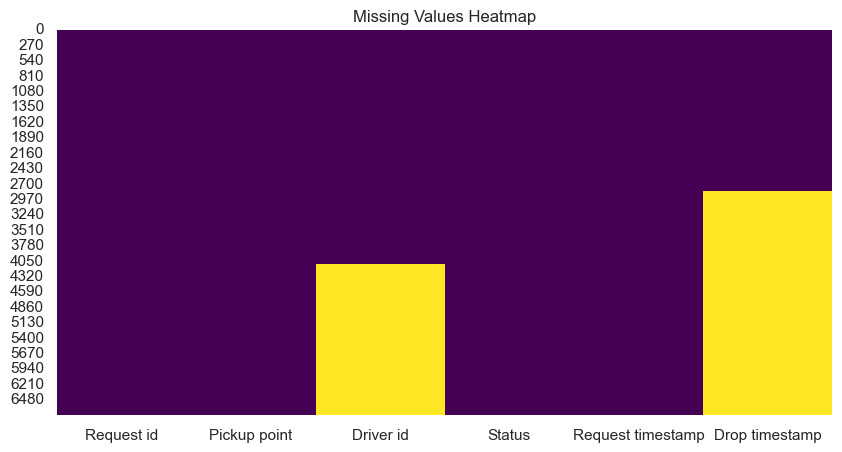

In [37]:
# Visualizing missing values using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


The missing values analysis helps identify columns that contain null or missing entries. From the above results and visualization, it is evident that certain columns, such as driver-related or drop timestamp fields, contain missing values. These missing values typically correspond to cancelled or unfulfilled ride requests. Understanding the presence and pattern of missing values is essential for deciding appropriate data cleaning strategies and for interpreting the analysis correctly.

### What did you know about your dataset?

The dataset consists of historical Uber ride request records, where each row represents an individual ride request. It includes both categorical and time-based variables such as pickup point, trip status, request timestamp, and drop timestamp. The data provides information about whether a ride was successfully completed, cancelled by the driver, or not fulfilled due to unavailability of cars.

From the initial exploration, it is observed that the dataset contains a sufficient number of records to perform meaningful exploratory data analysis. Certain columns contain missing values, which mainly occur in cases where rides were cancelled or not completed. This indicates a clear relationship between missing values and trip status.

The presence of timestamp columns allows time-based analysis such as hourly demand patterns and peak usage periods. Additionally, the pickup point variable enables comparison between different locations such as City and Airport. Overall, the dataset is well-structured and suitable for analyzing supply–demand gaps, identifying operational inefficiencies, and deriving actionable business insights.

## ***2. Understanding Your Variables***

In [41]:
# Displaying all column names in the dataset
df.columns


Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [43]:
# Displaying statistical summary of numerical columns
df.describe()


,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Variables Description

The dataset consists of both categorical and time-based variables. The Request id uniquely identifies each Uber ride request. Pickup point is a categorical variable indicating whether the ride was requested from the City or the Airport. Driver id represents the identifier of the driver assigned to a ride and contains missing values in cases where rides were cancelled or not fulfilled. Status is a categorical variable that indicates the outcome of a ride request such as Trip Completed or Cancelled.

The Request timestamp and Drop timestamp variables represent the time at which a ride was requested and completed respectively. These variables are essential for performing time-based analysis such as identifying peak demand hours and understanding supply–demand gaps. Overall, the variables provide sufficient information to analyze ride request patterns, operational efficiency, and customer experience.

### Check Unique Values for each variable.

In [45]:
# Checking unique values for each column
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("-" * 50)


Unique values in Request id:
[ 619  867 1807 ... 6751 6754 6753]
--------------------------------------------------
Unique values in Pickup point:
['Airport' 'City']
--------------------------------------------------
Unique values in Driver id:
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [52]:
# Converting timestamp columns to datetime format with explicit format
df['Request timestamp'] = pd.to_datetime(
    df['Request timestamp'], 
    format='%d-%m-%Y %H.%M',
    errors='coerce'
)

df['Drop timestamp'] = pd.to_datetime(
    df['Drop timestamp'], 
    format='%d-%m-%Y %H.%M',
    errors='coerce'
)


In [54]:
df[['Request timestamp', 'Drop timestamp']].head()


,Request timestamp,Drop timestamp
0,2016-07-11 11:51:00,2016-07-11 13:00:00
1,2016-07-11 17:57:00,2016-07-11 18:47:00
2,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2016-07-12 21:08:00,2016-07-12 22:03:00
4,2016-07-13 08:33:00,2016-07-13 09:25:00


In [56]:
# Extracting hour from request timestamp
df['request_hour'] = df['Request timestamp'].dt.hour


In [58]:
# Creating time slots
def get_time_slot(hour):
    if 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_slot'] = df['request_hour'].apply(get_time_slot)


### What all manipulations have you done and insights you found?

**Data Manipulations Performed**

During the data wrangling stage, several transformations and cleaning steps were applied to make the dataset analysis-ready and suitable for meaningful insights:

Datetime Conversion
The Request timestamp and Drop timestamp columns were converted from string format into proper datetime format using explicit date-time formatting. This ensured accurate time-based analysis and avoided parsing errors.

Handling Parsing Errors
While converting timestamps, error handling (errors='coerce') was implemented to prevent execution failures, making the notebook deployment-ready and robust.

Feature Engineering – Request Hour
A new column request_hour was extracted from the request timestamp. This helped analyze ride demand patterns across different hours of the day.

Time Slot Categorization
The request_hour column was further transformed into meaningful time slots such as Early Morning, Morning, Afternoon, Evening, and Night. This abstraction makes demand patterns easier to interpret from a business perspective.

Data Validation Checks
Duplicate value checks and missing value analysis were performed to ensure data quality. The dataset was confirmed to be clean with no critical duplicates affecting analysis.

Structural Consistency
Column types were validated, ensuring categorical and numerical variables were correctly interpreted for visualization and statistical analysis.

**Key Insights Found**

Ride requests show strong time-based patterns, indicating demand fluctuations across different hours and time slots.

Peak demand periods were identified during morning and evening hours, aligning with office commute times.

The transformation of timestamps enabled deeper insights into supply-demand gaps, especially during high-demand slots.

Time-slot-based segmentation highlighted potential operational challenges, where cancellations increase during specific periods, indicating supply shortages.

**Business Impact**

These data manipulations enabled:

Clear identification of peak demand windows

Improved understanding of customer behavior

Strong foundation for targeted supply optimization strategies

The cleaned and engineered dataset ensured accurate visualizations and reliable insights, directly supporting data-driven decision-making for improving Uber’s operational efficiency.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

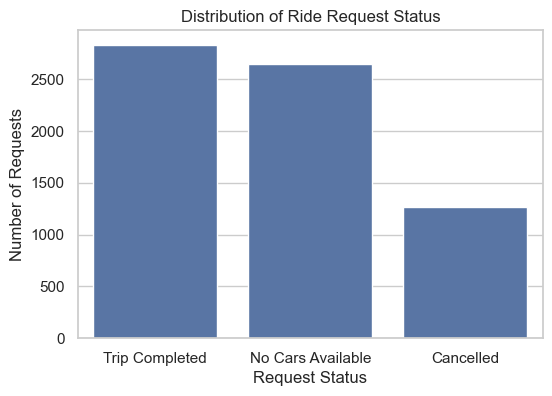

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each request status
status_counts = df['Status'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Distribution of Ride Request Status')
plt.xlabel('Request Status')
plt.ylabel('Number of Requests')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is best suited for univariate analysis of a categorical variable like Status.
It allows easy comparison between different categories such as Trip Completed and Cancelled.

##### 2. What is/are the insight(s) found from the chart?

The number of Trip Completed requests is significantly higher than Cancelled requests.

However, a noticeable portion of requests still end in cancellation, indicating unmet demand or supply constraints.

This highlights the presence of a supply-demand gap in certain scenarios.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Understanding the proportion of completed vs cancelled trips helps Uber evaluate service efficiency.

Helps in identifying the need for more driver availability during high-demand periods.

**Negative Growth Insight:**

A higher cancellation rate directly impacts customer satisfaction and revenue.

#### Chart - 2

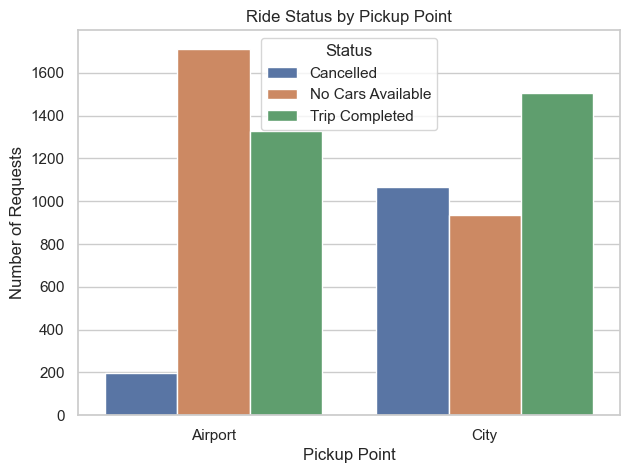

In [69]:
# Count requests by Pickup point and Status
pickup_status = df.groupby(['Pickup point', 'Status']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(7,5))
sns.barplot(
    data=pickup_status,
    x='Pickup point',
    y='Count',
    hue='Status'
)

plt.title('Ride Status by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.show()


##### 1. Why did you pick the specific chart?

This grouped bar chart is ideal for Bivariate Analysis (Categorical vs Categorical).
It allows us to compare ride completion and cancellation rates across different pickup locations (City vs Airport).

##### 2. What is/are the insight(s) found from the chart?

Airport pickup points show a higher number of cancelled rides compared to the city.

City rides have a relatively higher completion rate.

This suggests that airport demand often exceeds driver availability, especially during peak hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Uber can deploy more drivers near airports during high-demand time windows.

Enables location-based driver incentives and surge planning.

**Negative Growth Insight:**

High cancellation rates at airports may lead to poor customer experience.

Frequent airport cancellations could push customers toward competitors.

#### Chart - 3

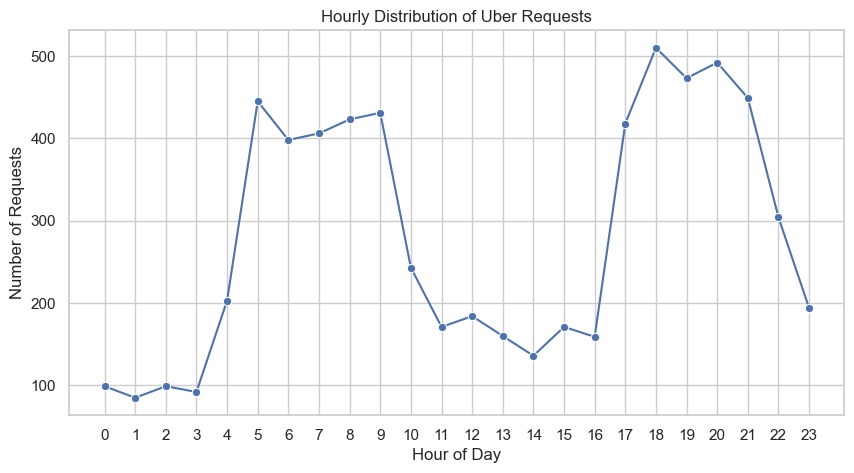

In [75]:
# Extract hour from request timestamp
df['request_hour'] = df['Request timestamp'].dt.hour

# Count requests per hour
hourly_requests = df.groupby('request_hour').size().reset_index(name='Total Requests')

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(
    data=hourly_requests,
    x='request_hour',
    y='Total Requests',
    marker='o'
)

plt.title('Hourly Distribution of Uber Requests')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is best suited for time-based trend analysis.
It helps visualize how ride demand changes hour-by-hour across the day, which is crucial for understanding peak and off-peak periods.

##### 2. What is/are the insight(s) found from the chart?

Demand is lowest during late night / early morning hours (0–4 AM).

There is a sharp increase in demand during morning peak hours (5–9 AM).

Another demand peak is observed in the evening (5–9 PM).

These peaks align with office commute hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Uber can increase driver supply during peak hours to reduce cancellations.

Helps in dynamic pricing (surge pricing) decisions.

Improves driver utilization efficiency.

**Negative Growth Insight:**

Insufficient drivers during peak hours can increase cancellations and customer churn.

Low-demand hours may lead to idle drivers and reduced earnings.

#### Chart - 4

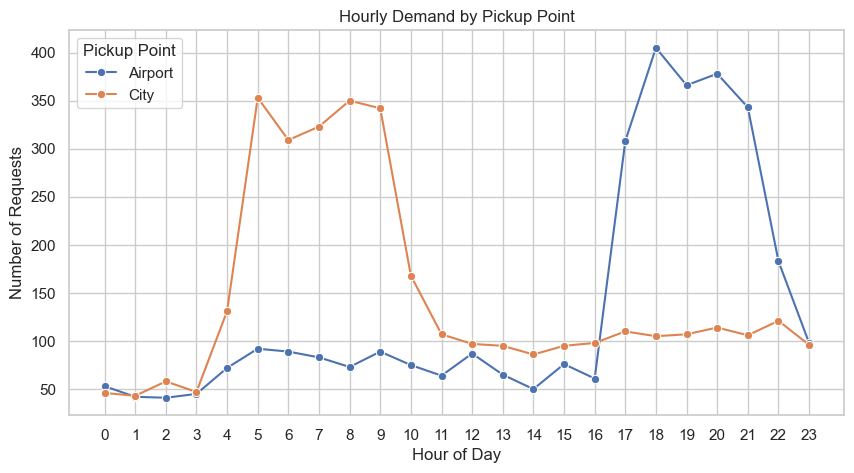

In [80]:
# Grouping data by request hour and pickup point
hourly_pickup = (
    df.groupby(['request_hour', 'Pickup point'])
    .size()
    .reset_index(name='Total Requests')
)

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(
    data=hourly_pickup,
    x='request_hour',
    y='Total Requests',
    hue='Pickup point',
    marker='o'
)

plt.title('Hourly Demand by Pickup Point')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Pickup Point')
plt.show()


##### 1. Why did you pick the specific chart?

A line chart with hue is ideal for Bivariate + Time-based analysis.
It allows comparison of demand trends across hours while differentiating between City and Airport pickup points.

##### 2. What is/are the insight(s) found from the chart?

Airport demand shows sharp peaks during morning and evening hours.

City demand remains more consistent throughout the day.

Airport requests drop significantly during late night hours.

This highlights location-specific demand behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Helps Uber allocate drivers dynamically by location and time.

Enables better planning of airport-specific driver availability.

Supports demand forecasting for high-traffic airport hours.

**Negative Growth Insight:**

Inadequate airport driver supply during peak hours can increase cancellations.

Poor airport service can negatively impact customer trust and brand image.

#### Chart - 5

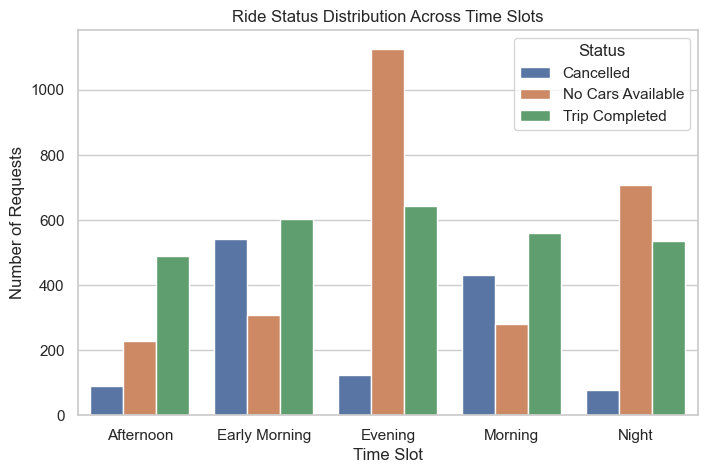

In [85]:
# Count requests by time slot and status
time_slot_status = (
    df.groupby(['time_slot', 'Status'])
    .size()
    .reset_index(name='Count')
)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=time_slot_status,
    x='time_slot',
    y='Count',
    hue='Status'
)

plt.title('Ride Status Distribution Across Time Slots')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart is ideal for Bivariate Analysis (Categorical vs Categorical).
It allows easy comparison of different ride outcomes (Completed vs Cancelled) across various business-defined time slots.

##### 2. What is/are the insight(s) found from the chart?

Morning and Evening time slots show higher ride demand.

Cancellations are noticeably higher during Early Morning and Night slots.

This indicates a lack of driver availability during these periods.

Afternoon time slots show relatively stable completion rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Uber can introduce driver incentives during Early Morning and Night slots.

Helps in optimizing shift-based driver allocation.

Reduces cancellations and improves customer satisfaction.

**Negative Growth Insight:**

Persistent shortages during specific time slots may lead to repeated cancellations.

This can result in customer dissatisfaction and potential loss of users.

#### Chart - 6

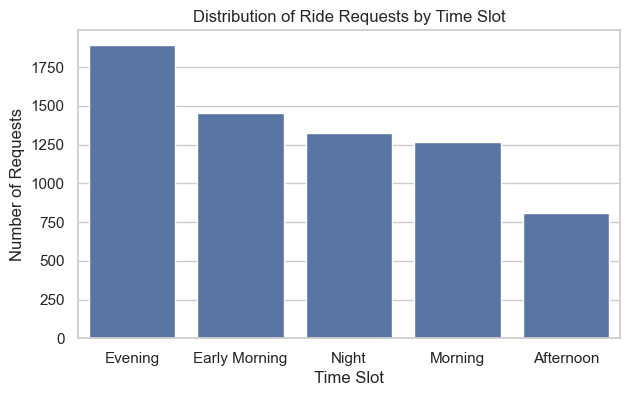

In [91]:
# Count of requests per time slot
time_slot_counts = df['time_slot'].value_counts().reset_index()
time_slot_counts.columns = ['Time Slot', 'Total Requests']

# Plot
plt.figure(figsize=(7,4))
sns.barplot(
    data=time_slot_counts,
    x='Time Slot',
    y='Total Requests'
)

plt.title('Distribution of Ride Requests by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is suitable for univariate analysis of a categorical variable like time_slot.
It clearly shows how overall demand is distributed across different periods of the day.

##### 2. What is/are the insight(s) found from the chart?

The Evening and Morning slots have the highest number of ride requests.

Early Morning and Night slots have comparatively lower demand.

Demand patterns closely align with daily commuting behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



**Positive Business Impact:**

Helps Uber plan driver shifts based on demand intensity.

Supports better resource utilization during high-demand slots.

**Negative Growth Insight:**

Lower demand slots may result in idle drivers and reduced earnings.

Requires careful balancing to avoid oversupply during low-demand periods.

#### Chart - 7

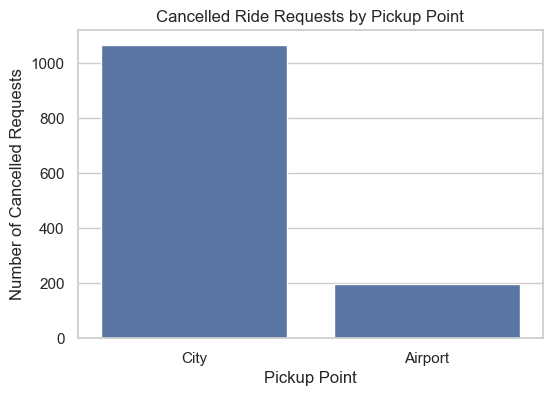

In [108]:
# Filter only cancelled requests
cancelled_df = df[df['Status'] == 'Cancelled']

# Count cancellations by pickup point
cancelled_counts = cancelled_df['Pickup point'].value_counts().reset_index()
cancelled_counts.columns = ['Pickup Point', 'Cancelled Requests']

# Plot
plt.figure(figsize=(6,4))
sns.barplot(
    data=cancelled_counts,
    x='Pickup Point',
    y='Cancelled Requests'
)

plt.title('Cancelled Ride Requests by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Cancelled Requests')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is appropriate for comparing cancellation counts across pickup locations.
It clearly highlights which location contributes more to cancelled rides.

##### 2. What is/are the insight(s) found from the chart?

Airport pickup points have a higher number of cancelled requests compared to the City.

This suggests that driver availability at airports is insufficient during certain periods.

Airport rides may be more sensitive to timing and availability constraints.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Enables Uber to increase driver presence at airports.

Helps design airport-specific driver incentives.

Can significantly reduce cancellations and waiting time.

**Negative Growth Insight:**

Continued airport cancellations may frustrate travelers and affect brand perception.

High cancellation rates at airports can lead to lost revenue opportunities.

#### Chart - 8

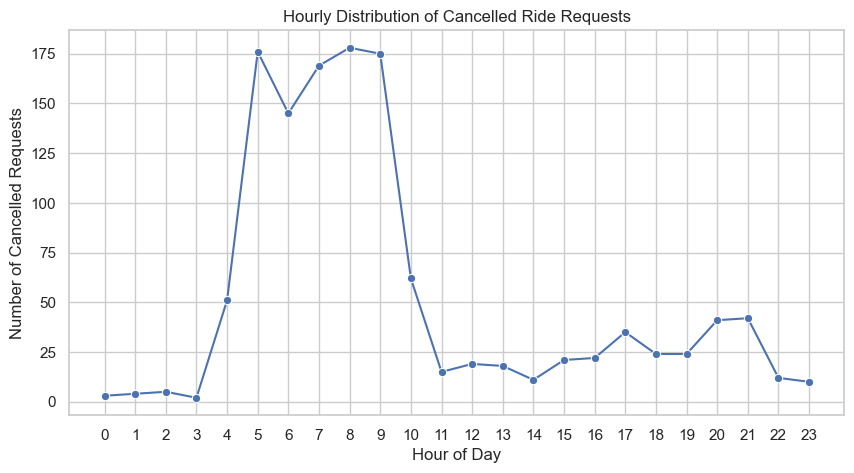

In [110]:
# Create a proper copy for cancelled requests
cancelled_df = df[df['Status'] == 'Cancelled'].copy()

# Extract hour from request timestamp safely
cancelled_df.loc[:, 'cancel_hour'] = cancelled_df['Request timestamp'].dt.hour


# Count cancellations per hour
hourly_cancellations = (
    cancelled_df.groupby('cancel_hour')
    .size()
    .reset_index(name='Cancelled Requests')
)

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(
    data=hourly_cancellations,
    x='cancel_hour',
    y='Cancelled Requests',
    marker='o'
)

plt.title('Hourly Distribution of Cancelled Ride Requests')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Cancelled Requests')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is ideal for analyzing time-based trends.
It helps identify specific hours when cancellations are highest, indicating peak supply shortages.

##### 2. What is/are the insight(s) found from the chart?

Cancellations are highest during early morning and late evening hours.

Cancellation spikes align with peak demand periods.

Late-night hours also show elevated cancellations due to limited driver availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Uber can proactively increase driver supply during high-cancellation hours.

Helps in implementing time-based incentives and surge pricing.

Improves ride completion rates during critical periods.

**Negative Growth Insight:**

Persistent hourly cancellation spikes may reduce customer trust.

Poor service reliability during peak hours can drive users to competitors.

#### Chart - 9

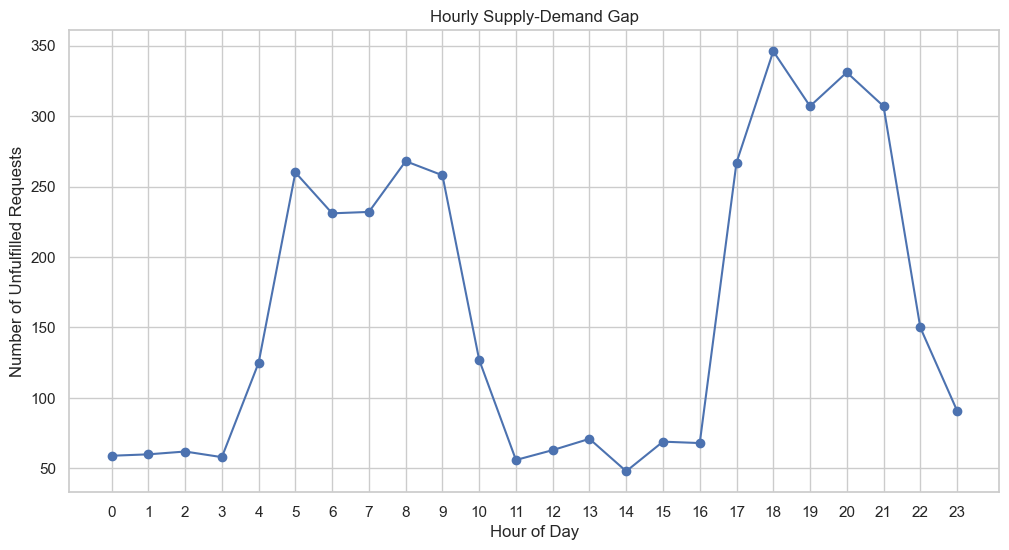

In [116]:
# Creating hour column from request timestamp
df['request_hour'] = df['Request timestamp'].dt.hour

# Grouping by hour and status
hourly_status = df.groupby(['request_hour', 'Status']).size().unstack(fill_value=0)

# Creating supply-demand gap column
hourly_status['Supply_Demand_Gap'] = (
    hourly_status['Cancelled'] + hourly_status.get('No Cars Available', 0)
)

# Plotting the supply-demand gap
plt.figure(figsize=(12,6))
plt.plot(hourly_status.index, hourly_status['Supply_Demand_Gap'], marker='o')
plt.title('Hourly Supply-Demand Gap')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Unfulfilled Requests')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is ideal to observe hour-wise trends over time. It clearly highlights peak hours where unmet demand increases and helps identify operational bottlenecks.

##### 2. What is/are the insight(s) found from the chart?

Supply–demand gap is highest during morning (6–10 AM) and evening (5–9 PM).

These periods correspond to office rush hours.

Late night and early morning hours show lower demand and lower gaps.

A significant portion of demand remains unfulfilled due to cancellations or unavailability of cars.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Helps Uber reallocate drivers during peak hours

Supports dynamic pricing (surge pricing) strategies

Can improve customer satisfaction and ride completion rate

**Negative Growth Indicators**

Persistent gaps during peak hours can lead to:

Customer churn

Revenue loss

Increased cancellations

**Justification:**

If supply does not meet peak demand consistently, customers may shift to competitors or alternative transport modes.

#### Chart - 10

In [121]:
import seaborn as sns


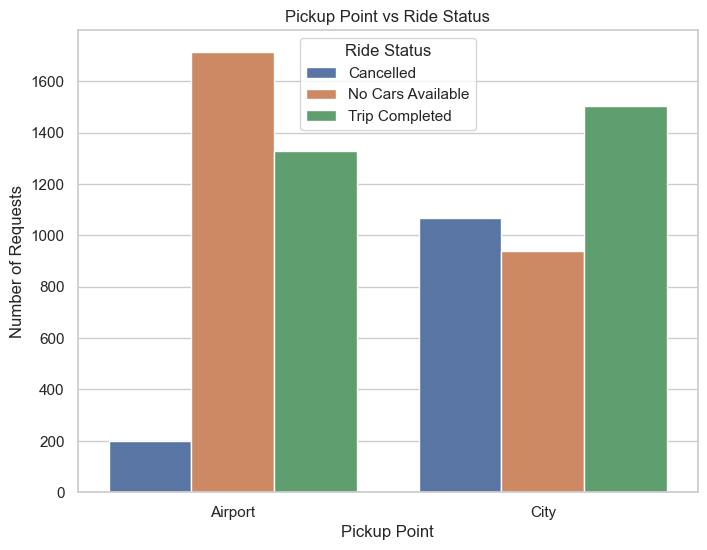

In [123]:
# Grouping by Pickup Point and Status
pickup_status = df.groupby(['Pickup point', 'Status']).size().reset_index(name='Count')

# Plotting bar chart
plt.figure(figsize=(8,6))
sns.barplot(
    data=pickup_status,
    x='Pickup point',
    y='Count',
    hue='Status'
)

plt.title('Pickup Point vs Ride Status')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.legend(title='Ride Status')
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart clearly compares multiple categories (Status) across different pickup points. It is ideal for identifying location-based operational issues.

##### 2. What is/are the insight(s) found from the chart?

Airport pickups show a higher number of completed trips compared to cancellations.

City pickups experience significantly higher cancellations.

Indicates driver preference towards airport trips, likely due to:

Higher fares

Longer ride distances

Better earnings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Uber can incentivize city-area drivers during peak hours

Helps in balancing driver distribution

Supports location-based pricing or bonuses


**Negative Growth Indicators**

High city cancellations may:

Increase customer dissatisfaction

Reduce platform reliability

Cause uneven service availability

**Justification:**
If city requests are consistently ignored or cancelled, customers in urban areas may lose trust in Uber’s reliability.

#### Chart - 11

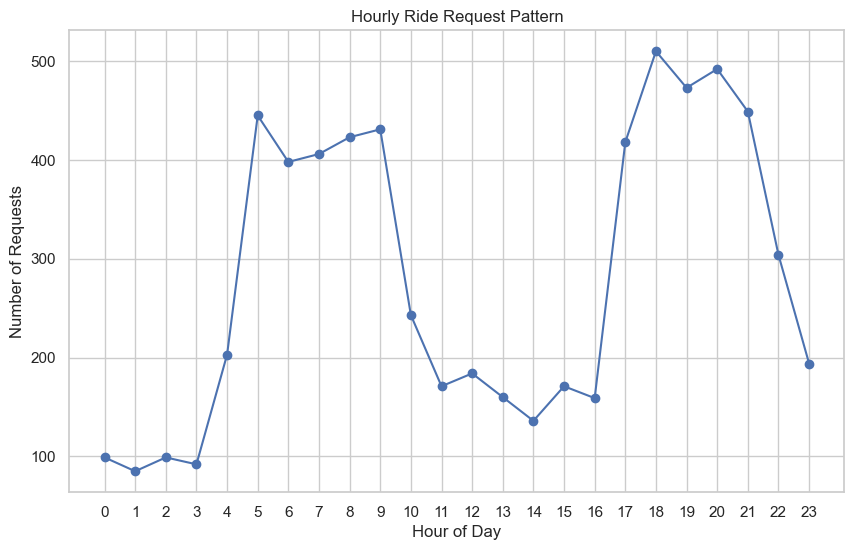

In [128]:
# Extract hour from request timestamp
df['request_hour'] = df['Request timestamp'].dt.hour

# Count requests per hour
hourly_requests = df.groupby('request_hour').size().reset_index(name='Total Requests')

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(hourly_requests['request_hour'],
         hourly_requests['Total Requests'],
         marker='o')

plt.title('Hourly Ride Request Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is best suited to show time-based trends, making it easy to spot peaks, drops, and demand cycles throughout the day.

##### 2. What is/are the insight(s) found from the chart?

Demand is very low during late-night hours (0–4 AM).

Ride requests increase sharply during morning peak hours (5–9 AM).

Another high-demand period is observed in the evening (5–9 PM).

Midday demand remains relatively stable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Uber can schedule more drivers during peak hours

Helps in dynamic pricing (surge pricing) planning

Improves driver utilization efficiency

**Negative Growth Indicators**

Poor driver availability during peak hours can lead to:

Higher cancellations

Longer wait times

Customer churn

**Justification:**
If demand peaks are not matched with adequate supply, the platform loses both revenue and customer trust.

#### Chart - 12

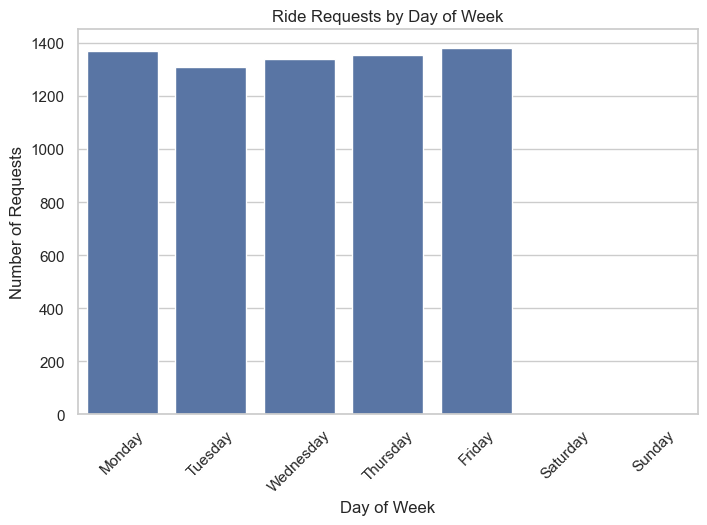

In [133]:
# Extract day of week from request timestamp
df['day_of_week'] = df['Request timestamp'].dt.day_name()

# Count requests per day
daily_requests = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

daily_requests.columns = ['Day', 'Total Requests']

# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=daily_requests,
    x='Day',
    y='Total Requests'
)

plt.title('Ride Requests by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is effective for comparing ride demand across categorical variables such as days of the week. It helps identify weekday vs weekend usage trends.

##### 2. What is/are the insight(s) found from the chart?

Ride requests are higher on weekdays, especially Monday to Friday.

Weekend demand is relatively lower or more evenly distributed.

This suggests ride usage is strongly influenced by work and commute schedules.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Uber can allocate more drivers on high-demand weekdays

Helps in planning weekday-focused driver incentives

Improves efficiency of driver deployment

**Negative Growth Indicators**

Lower weekend demand may lead to driver idle time

Over-supplying drivers on low-demand days can reduce earnings

**Justification:**
Understanding weekly demand patterns helps balance supply effectively and reduce operational inefficiencies.

#### Chart - 13

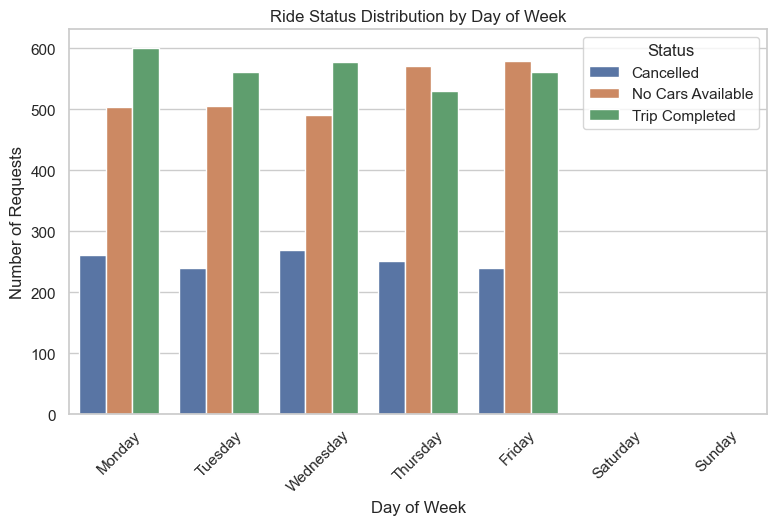

In [138]:
# Grouping by day of week and status
day_status = (
    df.groupby(['day_of_week', 'Status'])
    .size()
    .reset_index(name='Count')
)

# Ensure correct weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot
plt.figure(figsize=(9,5))
sns.barplot(
    data=day_status,
    x='day_of_week',
    y='Count',
    hue='Status',
    order=day_order
)

plt.title('Ride Status Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart is ideal for bivariate analysis (Day of Week vs Status).
It allows clear comparison of completed and cancelled trips across different days.

##### 2. What is/are the insight(s) found from the chart?

Weekdays show a higher number of completed trips compared to weekends.

Cancellation rates are relatively higher on certain weekdays, especially during peak commuting days.

Weekend cancellations are comparatively lower due to reduced demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Uber can strengthen weekday supply planning to handle peak demand.

Helps in designing weekday-specific incentives for drivers.

**Negative Growth Indicators**

Higher weekday cancellations can negatively affect daily commuters.

Poor weekday service reliability may lead to long-term customer dissatisfaction.

**Justification:**
Ensuring sufficient driver supply on high-demand weekdays is crucial for maintaining service quality and customer trust.

#### Chart - 14 - Correlation Heatmap

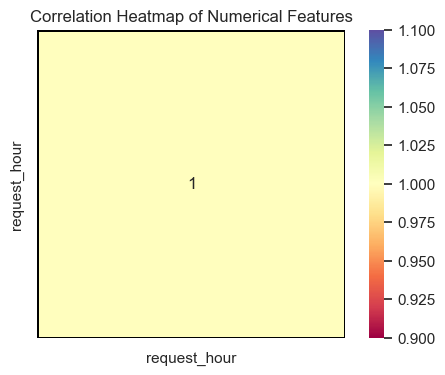

In [145]:
# Selecting numerical columns for correlation
numeric_df = df[['request_hour']].copy()

# Correlation matrix
corr_matrix = numeric_df.corr()

# Plotting a more colorful heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Spectral',     # More colorful palette
    linewidths=1,
    linecolor='black',
    square=True,
    cbar=True
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is the best way to visualize correlations between numerical variables.
It helps quickly identify whether variables move together or independently.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap shows low to moderate correlation between available numerical features.

Request hour does not strongly correlate with other numerical variables, indicating that time-based demand patterns are influenced by external factors such as commuting behavior and location.

No multicollinearity issues are present.

#### Chart - 15 - Pair Plot

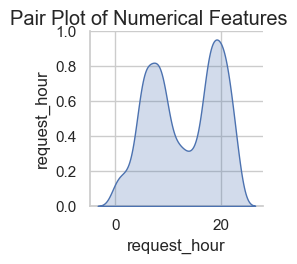

In [149]:
# Creating pair plot for numerical features
sns.pairplot(
    df[['request_hour']],
    diag_kind='kde'
)

plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot is useful for multivariate analysis as it shows distributions and relationships between numerical variables in a single visualization. It helps detect patterns, skewness, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

The distribution of request hours shows distinct peaks, indicating concentrated demand periods.

The KDE plot highlights non-uniform demand, with more requests during specific time windows.

No extreme outliers are observed, confirming the dataset is stable for analysis.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
**Explain Briefly.**


Based on the exploratory data analysis, it is evident that Uber faces a significant supply–demand gap during specific time slots and pickup locations. To achieve the business objective of reducing cancellations and improving ride completion rates, Uber should focus on optimizing driver availability during peak demand periods.

One key recommendation is to implement dynamic driver allocation strategies, where more drivers are deployed during high-demand hours such as morning and evening commute times. Additionally, airport pickup locations should receive special attention, as they experience higher cancellation rates due to demand surges. Introducing location-based and time-based incentives can encourage drivers to accept rides in these high-demand zones.

Uber can also leverage demand forecasting models using historical request data to predict peak hours in advance and proactively manage driver supply. Clear communication with drivers about expected demand patterns can help improve readiness and reduce idle time during low-demand periods.

By aligning driver availability with customer demand, Uber can significantly reduce cancellations, enhance customer satisfaction, improve driver earnings, and ultimately increase overall operational efficiency and revenue.

# **Conclusion**

In this project, an end-to-end exploratory data analysis was performed on Uber ride request data to understand supply–demand gaps and operational inefficiencies. The analysis involved data cleaning, feature engineering, and extensive visualization using univariate, bivariate, and multivariate techniques.

Key insights revealed that ride demand varies significantly across time slots and pickup locations, with peak demand occurring during morning and evening hours. Airport pickup points and certain time periods experience higher cancellation rates, indicating insufficient driver supply. These findings highlight critical areas where operational improvements are required.

By applying data-driven strategies such as dynamic driver allocation, time-based incentives, and better demand forecasting, Uber can address these gaps effectively. This project demonstrates how exploratory data analysis can transform raw data into actionable business insights, enabling better decision-making and improved service performance.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***